In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/dataset.zip -d data

Archive:  /content/drive/MyDrive/dataset.zip
   creating: data/Hackathon_Dataset/train_images/
 extracting: data/Hackathon_Dataset/train_images/CormorantGaramond-Regular_83.png  
  inflating: data/Hackathon_Dataset/train_images/Alef-Bold_72.png  
  inflating: data/Hackathon_Dataset/train_images/AnekGurmukhi-VariableFont_wdth,wght_73.png  
  inflating: data/Hackathon_Dataset/train_images/Alice-Regular_67.png  
  inflating: data/Hackathon_Dataset/train_images/Fondamento-Regular_76.png  
 extracting: data/Hackathon_Dataset/train_images/Eczar-VariableFont_wght_87.png  
  inflating: data/Hackathon_Dataset/train_images/Alef-Bold_78.png  
  inflating: data/Hackathon_Dataset/train_images/DenkOne-Regular_72.png  
  inflating: data/Hackathon_Dataset/train_images/AsapCondensed-Black_73.png  
  inflating: data/Hackathon_Dataset/train_images/CormorantSC-Regular_78.png  
 extracting: data/Hackathon_Dataset/train_images/Asar-Regular_87.png  
 extracting: data/Hackathon_Dataset/train_images/DenkOne-Re

In [7]:
!ls data
!ls data/Hackathon_Dataset/train_images

Hackathon_Dataset
Alef-Bold_65.png			    DenkOne-Regular_65.png
Alef-Bold_66.png			    DenkOne-Regular_66.png
Alef-Bold_67.png			    DenkOne-Regular_67.png
Alef-Bold_68.png			    DenkOne-Regular_68.png
Alef-Bold_69.png			    DenkOne-Regular_69.png
Alef-Bold_70.png			    DenkOne-Regular_70.png
Alef-Bold_71.png			    DenkOne-Regular_71.png
Alef-Bold_72.png			    DenkOne-Regular_72.png
Alef-Bold_73.png			    DenkOne-Regular_73.png
Alef-Bold_74.png			    DenkOne-Regular_74.png
Alef-Bold_75.png			    DenkOne-Regular_75.png
Alef-Bold_76.png			    DenkOne-Regular_76.png
Alef-Bold_77.png			    DenkOne-Regular_77.png
Alef-Bold_78.png			    DenkOne-Regular_78.png
Alef-Bold_79.png			    DenkOne-Regular_79.png
Alef-Bold_80.png			    DenkOne-Regular_80.png
Alef-Bold_81.png			    DenkOne-Regular_81.png
Alef-Bold_82.png			    DenkOne-Regular_82.png
Alef-Bold_83.png			    DenkOne-Regular_83.png
Alef-Bold_84.png			    DenkOne-Regular_84.png
Alef-Bold_85.png			    DenkOne-Regular_85.png
Alef-Bold_86.png

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(directory, img_size=(28, 28)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img)

            # Normalizing
            img_array = (img_array - 127.5) / 127.5
            images.append(img_array)
    return np.array(images)

data_directory = 'data/Hackathon_Dataset/train_images'
real_data = load_images(data_directory)
print(f"Loaded {real_data.shape[0]} images")


Loaded 520 images


In [10]:
import tensorflow as tf
from tensorflow.keras import layers


def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(28 * 28 * 1, activation="tanh"))
    model.add(layers.Reshape((28, 28, 1)))
    return model


def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model


def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [17]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(optimizer="adam", loss="binary_crossentropy")

epochs = 10000
batch_size = 32
half_batch = batch_size // 2

for epoch in range(epochs):

    noise = np.random.normal(0, 1, (half_batch, 100))
    generated_images = generator.predict(noise)
    real_images = real_data[np.random.randint(0, real_data.shape[0], half_batch)]
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))


    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
Epoch 6000 | Discriminator Loss: [0.67633373 0.6875    ] | Generator Loss: 1.1872167587280273
1/1 [==============================] - 0s 22ms/step
Epoch 7000 | Discriminator Loss: [0.6762073 0.625    ] | Generator Loss: 1.2303450107574463
1/1 [==============================] - 0s 24ms/step
Epoch 8000 | Discriminator Loss: [0.48184904 0.8125    ] | Generator Loss: 1.3527368307113647
1/1 [==============================] - 0s 23ms/step
Epoch 9000 | Discriminator Loss: [0.57440394 0.6875    ] | Generator Loss: 1.1854277849197388
1/1 [==============================] - 0s 37ms/step


In [ ]:
if real_data.shape[0] > 0:
    real_images = real_data[np.random.randint(0, real_data.shape[0], half_batch)]
else:
    real_images = np.random.normal(0, 1, (half_batch, 28, 28, 1))

In [12]:
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 127ms/step


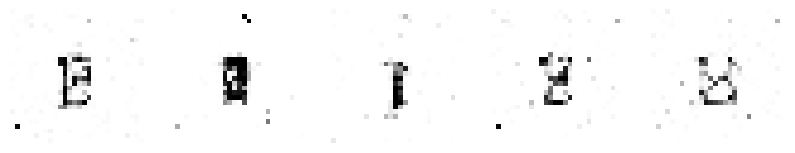

In [19]:
import matplotlib.pyplot as plt
def generate_and_save_images(model, epoch, test_input):
    predictions = model.predict(test_input)
    fig = plt.figure(figsize=(10, 2))

    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

noise = np.random.normal(0, 1, (5, 100))
generate_and_save_images(generator, epochs, noise)


1/1 [==============================] - 0s 24ms/step


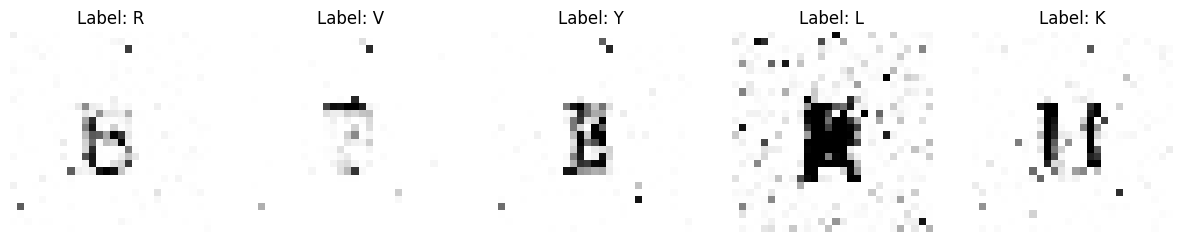

In [20]:
def generate_and_label_images(generator, num_images=5):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)

    labels = np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        ax = axes[i]
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

    plt.show()

generate_and_label_images(generator)
